# Regresíon Logistica
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo
5. Entrenar el modelo configurando los diferentes hiperparámetros
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos
9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/ 

## 1. 

In [16]:
#Realizamos la carga de las librerias
import pandas as pd 
import numpy as np # 
import seaborn as sns 
import matplotlib.pyplot as plt 

# carga de librerias del modelo de regresíon logistica
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#from sklearn.linear_model import LinearRegression -> Librería para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix



In [17]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('C:\\Users\\usuario\\Desktop\\Data set tarea 2\\heart_cleveland_upload.csv')

In [29]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(300)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [15]:
# Descripción de los datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

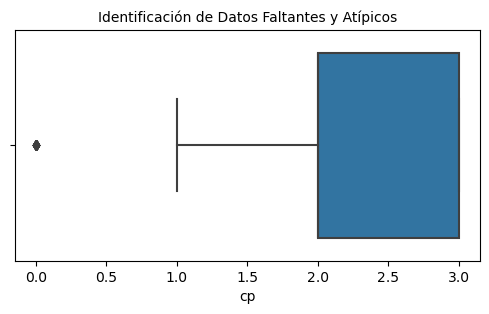

In [19]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['cp'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

## 2. 

In [27]:
#Revisión de datos faltantes

for column in Datos.columns:
    zero_values = (Datos[column] == 0).sum()
    print("Cantidad de valores igual a cero en {}: {}".format(column, zero_values))

Cantidad de valores igual a cero en age: 0
Cantidad de valores igual a cero en sex: 96
Cantidad de valores igual a cero en cp: 23
Cantidad de valores igual a cero en trestbps: 0
Cantidad de valores igual a cero en chol: 0
Cantidad de valores igual a cero en fbs: 254
Cantidad de valores igual a cero en restecg: 147
Cantidad de valores igual a cero en thalach: 0
Cantidad de valores igual a cero en exang: 200
Cantidad de valores igual a cero en oldpeak: 96
Cantidad de valores igual a cero en slope: 139
Cantidad de valores igual a cero en ca: 174
Cantidad de valores igual a cero en thal: 164
Cantidad de valores igual a cero en condition: 160


In [31]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna en este 
# caso para el ejercicio vamos solo a cambiar los datos de la variable cp que corresponde
# a tipo de dolor de pecho ya que otras variables con datos en 0 se pueden interpretar como 
# datos que entregan cierta información que no podemos obviar.
Datos['cp']=Datos['cp'].replace(0,Datos['cp'].mean())


In [33]:
#Revisión nuevamente de datos faltantes

print("Cantidad de Registros con cero en chest pain: ",Datos['cp'].isin([0]).sum())


Cantidad de Registros con cero en chest pain:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

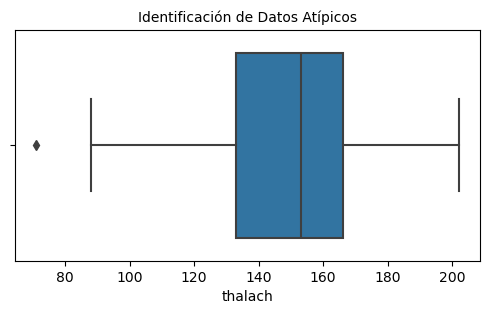

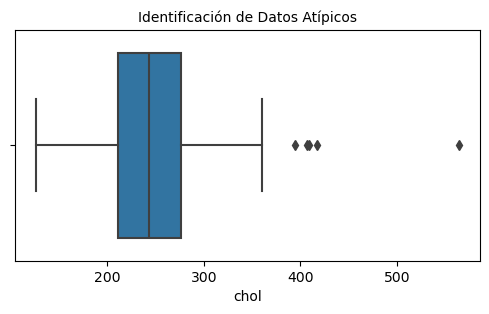

In [44]:
#Identificación de Datos Atípicos en este caso vamos a ver algunos datos fuera del rango comun
# en las variables de colesterol y maximo ritmo cardiaco 

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )



In [55]:
#Conteo de Datos Atípicos, para el ejemplo vamos a utilizar el dato más bajo de colesterol
# y el dato más alto del máximo ritmo cardiaco

nivel_minimo=80
nivel_maximo=500
Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de datos atípicos en 'chol' es {}".format(Total_Atipicos))
Total_Atipicos=((Datos['thalach']<nivel_minimo)|(Datos['thalach']>nivel_maximo)).sum()
print("El total de datos atípicos en 'thalach' es {}".format(Total_Atipicos))

El total de datos atípicos en 'chol' es 1
El total de datos atípicos en 'thalach' es 1


In [56]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['chol']<nivel_maximo)&(Datos['chol']>nivel_minimo)]
Datos=Datos[(Datos['thalach']<nivel_maximo)&(Datos['thalach']>nivel_minimo)]

In [57]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de datos atípicos en 'chol' es {}".format(Total_Atipicos))
Total_Atipicos=((Datos['thalach']<nivel_minimo)|(Datos['thalach']>nivel_maximo)).sum()
print("El total de datos atípicos en 'thalach' es {}".format(Total_Atipicos))

El total de datos atípicos en 'chol' es 0
El total de datos atípicos en 'thalach' es 0


In [58]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        295 non-null    int64  
 1   sex        295 non-null    int64  
 2   cp         295 non-null    float64
 3   trestbps   295 non-null    int64  
 4   chol       295 non-null    int64  
 5   fbs        295 non-null    int64  
 6   restecg    295 non-null    int64  
 7   thalach    295 non-null    int64  
 8   exang      295 non-null    int64  
 9   oldpeak    295 non-null    float64
 10  slope      295 non-null    int64  
 11  ca         295 non-null    int64  
 12  thal       295 non-null    int64  
 13  condition  295 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 34.6 KB


## 3.

Característica de interes:
* condicion cardiaca: si la persona tiene alguna condicion cardiaca o no (0 = no tiene  - 1 = si tiene )
* Predecir si una persona puede tener diabetes

In [60]:
# Total de personas con condicion cardiaca especial

Datos['condition'].value_counts()

condition
0    159
1    136
Name: count, dtype: int64

In [62]:
Datos[['condition']].head(10)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


## 4. 

In [63]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna condición
Y = Datos['condition'] # Se cargan los datos de train con los datos de la la columna condición

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)


In [64]:
print (X_train)

     age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
232   57    0  3.0       128   303    0        2      159      0      0.0   
53    48    1  1.0       130   245    0        2      180      0      0.2   
102   58    1  2.0       140   211    1        2      165      0      0.0   
189   62    0  3.0       138   294    1        0      106      0      1.9   
169   66    1  3.0       160   228    0        2      138      0      2.3   
..   ...  ...  ...       ...   ...  ...      ...      ...    ...      ...   
73    71    0  2.0       110   265    1        2      130      0      0.0   
168   66    1  3.0       112   212    0        2      132      1      0.1   
154   37    0  2.0       120   215    0        0      170      0      0.0   
153   37    1  2.0       130   250    0        0      187      0      3.5   
260   51    1  3.0       140   298    0        0      122      1      4.2   

     slope  ca  thal  
232      0   1     0  
53       1   0     0  
102   

In [65]:
print (Y_train)

232    0
53     0
102    0
189    1
169    0
      ..
73     0
168    1
154    0
153    0
260    1
Name: condition, Length: 221, dtype: int64


## 5. 

In [66]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación


In [67]:
print (Y_test)

112    0
252    1
241    1
163    1
285    0
      ..
172    0
136    1
138    0
221    1
33     1
Name: condition, Length: 74, dtype: int64


In [68]:
print (Prediccion)

[0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0
 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0]


## 6. 

In [69]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.85      0.87        34

    accuracy                           0.88        74
   macro avg       0.88      0.88      0.88        74
weighted avg       0.88      0.88      0.88        74



## 7. 

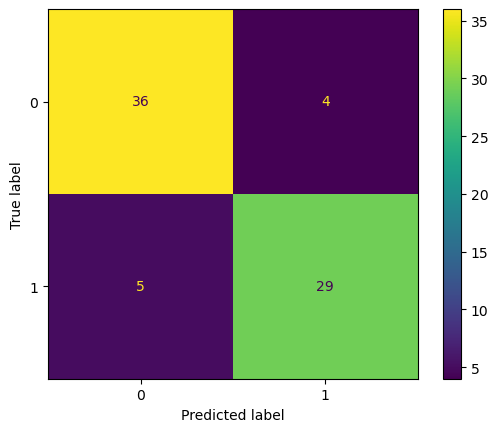

In [70]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

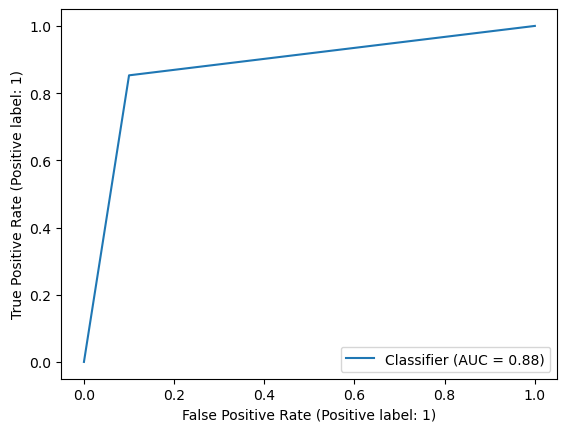

In [71]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos

Del desempeño del modelo se puede describir:

Precisión: Indica la proporción de identificaciones positivas que fueron realmente correctas. Para la clase 0, la precisión es del 0.88, lo que significa que el 88% de las veces que el modelo predijo la clase 0, fue correcto. Para la clase 1, también es del 0.88.

Recall (Sensibilidad): Muestra la proporción de positivos reales que fueron identificados correctamente. Para la clase 0, es del 0.90, indicando que el modelo capturó el 90% de todos los casos reales de la clase 0. Para la clase 1, es del 0.85, capturando el 85% de los casos de la clase 1
.
F1-Score: Es la media armónica de la precisión y el recall, y da una idea del balance entre estas dos métricas. Un F1-Score de 0.89 para la clase 0 y 0.87 para la clase 1 sugiere un buen equilibrio entre la precisión y el recall para ambas clase
s.
Support: Es el número de ocurrencias reales de la clase en el conjunto de datos. Hay 40 instancias de la clase 0 y 34 de la clase
 1.
Accuracy (Exactitud): Es la proporción de predicciones correctas entre todas las predicciones hechas. Aquí, la exactitud es del 0.88, lo que significa que el 88% de todas las predicciones del modelo fueron correc
tas.
Macro Avg: Es el promedio de la precisión, el recall y el F1-Score sin tener en cuenta el desbalance entre clases. Aquí, todos tienen un valor de 
0.88.
Weighted Avg: Es similar al macro promedio, pero tiene en cuenta el desbalance entre clases ponderando las métricas de acuerdo al número de instancias en cada clase. También resulta en 0.88 para la precisión, el recall y el F1-Score.


De la Matriz de Confusión podemos interpreVerdaderos Negativos (Superior Izquierdo): El modelo predijo correctamente 36 casos como clase 0.

Falsos Positivos (Superior Derecho): El modelo predijo incorrectamente 4 casos como clase 1 cuando en realidad eran clase 0
.
Falsos Negativos (Inferior Izquierdo): El modelo predijo incorrectamente 5 casos como clase 0 cuando en realidad eran clase 
1.
Verdaderos Positivos (Inferior Derecho): El modelo predijo correctamente 29 casos como clase
tiCurva ROC: La línea azul representa el rendimiento del clasificador. Cuanto más cerca esté la curva de la esquina superior izquierda, mejor es el rendimiento del modelo.

Eje X - Tasa de Falsos Positivos: Representa la proporción de negativos reales que fueron incorrectamente clasificados como positivos. Varía de 0.0 a 1.0
.
Eje Y - Tasa de Verdaderos Positivos: Indica la proporción de positivos reales que fueron correctamente clasificados. También varía de 0.0 a 1.
0.
AUC (Área Bajo la Curva): El valor de AUC es 0.88, lo que indica que el clasificador tiene un buen nivel de distinción entre las dos clases. Un AUC de 1 representa un clasificador perfecto, mientras que un AUC de 0.5 representa un rendimiento no mejor que el azar.asificación.

